In [4]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load data 
docs_df = pd.read_csv('./test_user_pref_count_20190607_10000_100.csv')

X = docs_df.drop(['user_pref'],axis=1)
y = docs_df['user_pref']

Text(0.5, 1.0, 'Elbow method')

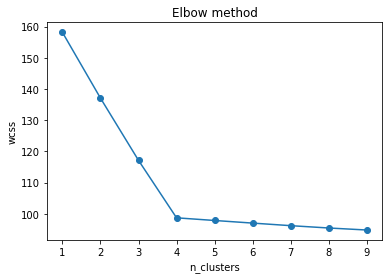

In [6]:
# normalize data 
X_normalize = X.apply(lambda x : x/np.sum(x),axis=1).values

# select the number of clusters via "the elbow method
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_normalize)
    wcss.append(kmeans.inertia_)
    
# plot 'n_clusters vs. within-cluster sum_square'
x = range(1,10)
plt.plot(x,wcss,marker='o')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('Elbow method')

In [7]:
# use elbow_k_cluster to fit 

k_means = KMeans(n_clusters=4)
k_means.fit(X_normalize) 
y_pred = k_means.labels_
print(y_pred[::1000])
print(y[::1000])

[2 3 1 3 2 1 3 3 1 1]
0       music_lover
1000     idol_otaku
2000     sports_man
3000     idol_otaku
4000    music_lover
5000     sports_man
6000     idol_otaku
7000     idol_otaku
8000     sports_man
9000     sports_man
Name: user_pref, dtype: object


In [8]:
pref_to_clust = {'idol_otaku':3,'music_lover':2,'sports_man':1,'foodie':0}
y_true = y.apply(lambda x : pref_to_clust[x])

# Accuaray
print('accuracy:',accuracy_score(y_true, y_pred, normalize=True))

accuracy: 0.9993
